# Zachary's karate club

In this example, we used the ELK on the Zachary's karate club. We will compare the difference between the nodal hierarchies using the Tanimoto coefficient, as prescribed in the original link community algorithm.

In [1]:
T = True
F = False
import networkx as nx
from modules.main import ELK
from networks.toy import TOY
from plotting_jupyter.plotting_H import Plot_H
from modules.colregion import colregion
from various.network_tools import *

In [2]:
G = nx.karate_club_graph()

nodes = 34
A = np.zeros((34, 34))
for u, v in G.edges:
    A[u, v] = 1
    A[v, u] = 1

linkage = "single"
lookup = F
cut = F
mode = "ZERO"
topology = "MIX"
index = "H2"
score = "_D"

properties = {
  "structure" : "Zachary",
  "lookup" : lookup,
  "cut" : cut,
  "topology" : topology,
  'index' : index
}

In [3]:
NET = TOY(A, **properties)
NET.set_labels(np.arange(nodes))
H = ELK(A, nodes, linkage, mode, undirected=T, **properties)
# # Compute quality functions ----
H.compute_H_features_cpp()
## Compute link entropy ----
H.link_entropy_cpp("short", cut=cut)
## Compute la arbre de merde ----
H.la_abre_a_merde_cpp()
## Compute node entropy ----
H.node_entropy_cpp("short", cut=cut)
# Set labels to network ----
L = colregion(NET)
L.get_regions()
H.set_colregion(L)

Compute link hierarchical agglomeration ----
	> Compute features
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 155

	link entropy :  Sh : 0.2779, and Sv : 0.7221


	link entropy H: Sh : 0.2531, and Sv : 0.7469

	> Compute the node hierarchy ----
25%
50%
Commencer: la abre a merde
75%
Voila, bon ami
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 67

	Node entropy :  Sh : 0.2332, and Sv : 0.7668


	Node entropy H: Sh : 0.1792, and Sv : 0.8208



	> Plot D as a function of K
Visualize nodal dendrogram!!!


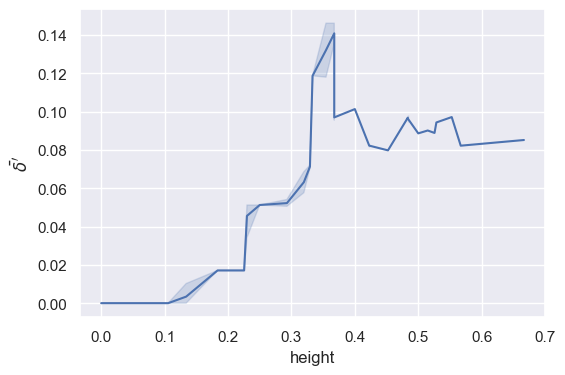

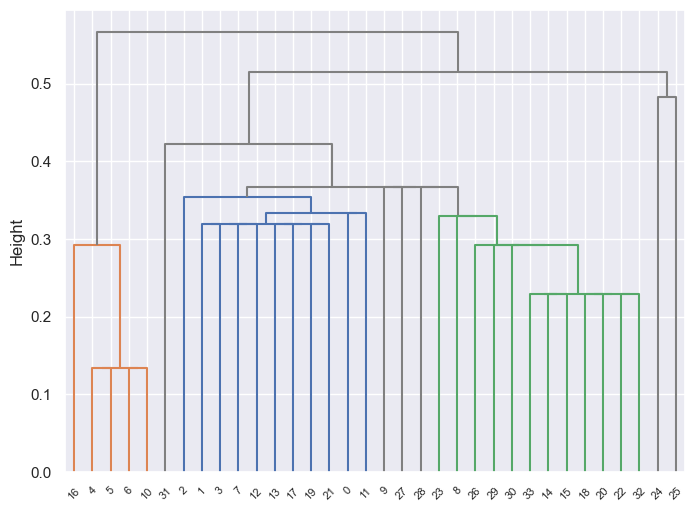

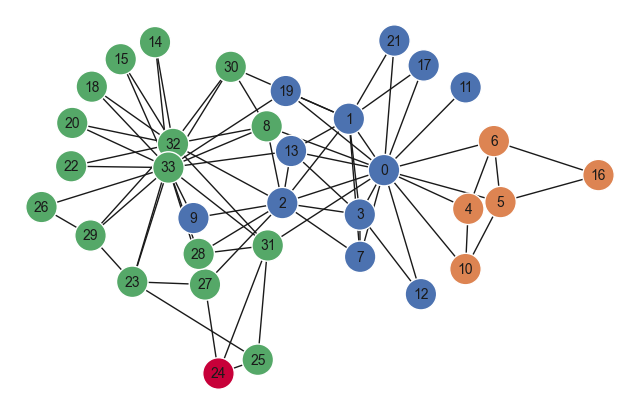

In [4]:
plot_h = Plot_H(H)
k, r = get_best_kr_equivalence(score, H)
rlabels = get_labels_from_Z(H.Z, r)
rlabels = skim_partition(rlabels)
_, noc_covers, noc_sizes, rlabels2 = H.discovery(rlabels, k, direction="both", undirected=T, index=index)
plot_h.plotD(width=6, height=4)
plot_h.nodal_dendrogram(r, cmap_name="deep", width=8, height=6)
plot_h.plot_network_kk(
  NET.A, rlabels2, noc_covers, noc_sizes,
  ang=80, font_size=10, undirected=T, width=8, height=6,
  cmap_name="deep"
)

### What is happening with node 24?

Node 24 has a carmine (intense dark red) color because it does not belong to any node community or covers at the best link density partition ($\bar{\delta'}$) and is not assigned to any cover. That explains why node 24 was not given any cover because its nearest neighbors (25, 27, and 31) are also single nodes.

The cover assignment operation computes the average dissimilarity between the reference (single node) and its nearest neighbors in their node communities. Since the nearest neighbors of 24 are single nodes, they do not belong to any community, so node 24 cannot be assigned to any node community.

Notice that nodes 25, 27, and 31 can be assigned to a community because their nearest neighbors are community nodes.

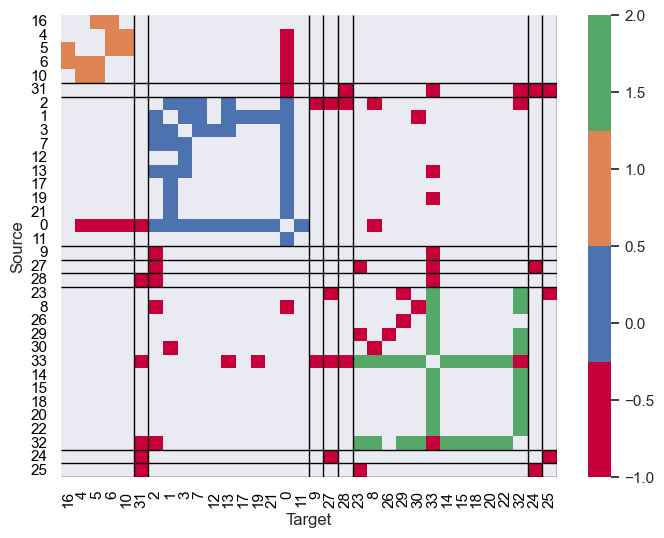

In [5]:
plot_h.lcmap_dendro(
  r, k, cmap_name="deep", width=8, height=6, undirected=True
)